In [1]:
# Import required libraries

# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
tensorflow.__version__

'2.16.1'

In [2]:
import os
os.chdir('C:/Users/FARHAN/Downloads/archive')
file_path = 'flowers'
df = pd.DataFrame(columns=['file_name','class','image'])


In [3]:
import cv2
for i in os.listdir(file_path):
    if i != '.DS_Store': #This if condition is machine specific - can be ignored 
        print(i)

daisy
dandelion
rose
sunflower
tulip


In [4]:
for flower_class in os.listdir(file_path):
    class_path = os.path.join(file_path, flower_class)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            if img_file.endswith('.jpg') or img_file.endswith('.png'):
                img_path = os.path.join(class_path, img_file)
                img = cv2.imread(img_path)
               # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                df = df.append({
                    'file_name': img_file,
                    'class': flower_class,
                    'image': img
                }, ignore_index=True)
df.tail()

,file_name,class,image
4312,9831362123_5aac525a99_n.jpg,tulip,"[[[54, 232, 237], [35, 232, 234], [50, 233, 23..."
4313,9870557734_88eb3b9e3b_n.jpg,tulip,"[[[83, 135, 148], [81, 136, 149], [77, 138, 14..."
4314,9947374414_fdf1d0861c_n.jpg,tulip,"[[[75, 75, 81], [63, 92, 96], [20, 80, 79], [8..."
4315,9947385346_3a8cacea02_n.jpg,tulip,"[[[135, 124, 132], [159, 158, 154], [117, 123,..."
4316,9976515506_d496c5e72c.jpg,tulip,"[[[41, 58, 54], [44, 46, 56], [89, 75, 77], [1..."


In [5]:
df.sample(20)

,file_name,class,image
3358,11746276_de3dec8201.jpg,tulip,"[[[112, 60, 137], [93, 49, 110], [59, 21, 73],..."
1349,34724303275_b9494837aa_n.jpg,dandelion,"[[[57, 126, 115], [50, 110, 100], [49, 95, 89]..."
1154,2608937632_cfd93bc7cd.jpg,dandelion,"[[[187, 185, 184], [176, 167, 180], [169, 160,..."
3275,9216286876_289a4779f7.jpg,sunflower,"[[[89, 138, 140], [73, 108, 98], [57, 156, 184..."
1487,4669815582_0a994fb4fd_m.jpg,dandelion,"[[[30, 47, 43], [51, 65, 59], [75, 79, 73], [9..."
3434,13910719110_1b21d1fc81.jpg,tulip,"[[[83, 131, 102], [82, 130, 101], [79, 129, 99..."
3470,14055533888_f8e66b5693_n.jpg,tulip,"[[[13, 25, 19], [6, 18, 12], [5, 18, 10], [10,..."
821,13900486390_5a25785645_n.jpg,dandelion,"[[[1, 23, 28], [1, 23, 28], [1, 23, 28], [1, 2..."
1195,32558425090_d6b6e86d85_n.jpg,dandelion,"[[[6, 6, 6], [5, 5, 5], [5, 5, 5], [5, 5, 5], ..."
933,16096748028_7876887ab2.jpg,dandelion,"[[[11, 4, 41], [11, 4, 41], [11, 4, 41], [11, ..."


In [6]:
df.isna().sum()

file_name    0
class        0
image        0
dtype: int64

In [7]:
df.shape

(4317, 3)

In [8]:
df.ndim

2

In [9]:
len(df)

4317

In [10]:
len(df.columns)

3

In [11]:
# No missing values
# Vizualizing the images

def sample_img(df,n):
    df = df.sample(n)
    plt.figure(figsize=(20,20))
    for i,j in enumerate(df.iterrows()):
        plt.subplot(1,n,i+1)
        plt.imshow(j[1]['image'])
        plt.title("{}".format(j[1]['class'])) 

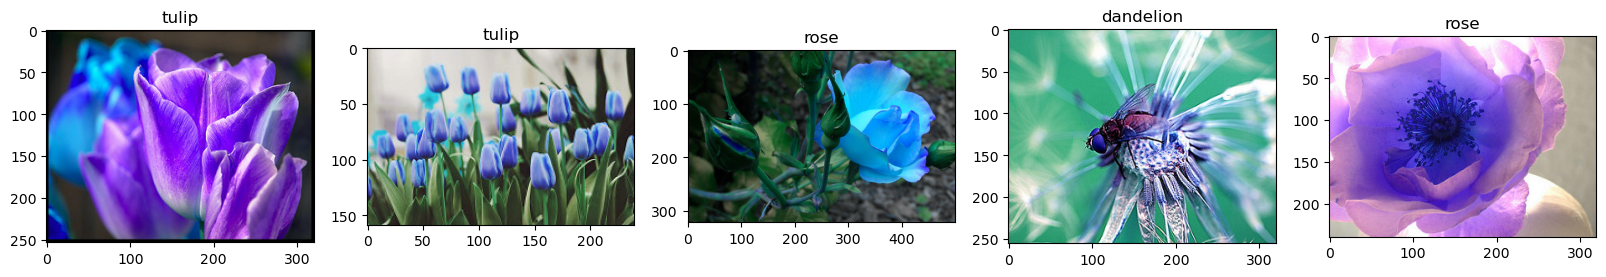

In [12]:
sample_img(df,5)

In [13]:
# Creating X_val and y_val

X_vl = df['image']
y_vl = df['class']

# Checking shapes
print("Initial shapes:")
print("X_vl:", X_vl.shape)
print("y_vl:", y_vl.shape)

# Reshaping X_val and reducing image size
X_val = []
for img in X_vl:
    resized_img = cv2.resize(img, (128, 128))  # Reduced size from 128x128 to 64x64
    X_val.append(resized_img)

X_val = np.array(X_val)
print("New shape of X_val:", X_val.shape)

Initial shapes:
X_vl: (4317,)
y_vl: (4317,)
New shape of X_val: (4317, 128, 128, 3)


In [14]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_val, y_vl, test_size=0.2, random_state=28)

In [15]:
# Normalizing the data
X_train = (X_train / 255.0).astype('float32')
X_val = (X_val / 255.0).astype('float32')


In [16]:
print("Shapes after normalization:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)

Shapes after normalization:
X_train: (3453, 128, 128, 3)
X_val: (864, 128, 128, 3)
y_train: (3453,)
y_val: (864,)


In [17]:
# Trying to check the max and min values

print("Max and Min value in X_train:", X_train.max(), X_train.min())
print("Max and Min value in X_test:", X_val.max(), X_val.min())

Max and Min value in X_train: 1.0 0.0
Max and Min value in X_test: 1.0 0.0


In [18]:
# Convert target feature to one-hot vectors
y_train_onehot = pd.get_dummies(y_train)
y_val_onehot = pd.get_dummies(y_val)

print("Shape of y_train_onehot:", y_train_onehot.shape)
print("Shape of y_val_onehot:", y_val_onehot)
print("Shape of y_val_onehot:", y_val_onehot.shape)

Shape of y_train_onehot: (3453, 5)
Shape of y_val_onehot:       daisy  dandelion  rose  sunflower  tulip
2070      0          0     1          0      0
1329      0          1     0          0      0
3334      0          0     0          0      1
1848      0          0     1          0      0
3699      0          0     0          0      1
...     ...        ...   ...        ...    ...
3766      0          0     0          0      1
2718      0          0     0          1      0
298       1          0     0          0      0
2981      0          0     0          1      0
3596      0          0     0          0      1

[864 rows x 5 columns]
Shape of y_val_onehot: (864, 5)


In [36]:
# Initializing basic CNN model

from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.models import Sequential


model = Sequential()
model.add(Conv2D(filters=128, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())

model.add(Dense(5, activation="softmax"))






In [37]:
# Compiling model
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2,restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 124, 124, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 122, 122, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 476288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │       2,381,445 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,477,285 (9.45 MB)

 Trainable params: 2,477,285 (9.45 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Fitting the model
train=model.fit(X_train, y_train_onehot , validation_data=(X_val,y_val_onehot), 
                  epochs=10,batch_size=32,callbacks=callback
                  )

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 498s 5s/step - accuracy: 0.6853 - loss: 0.3088 - val_accuracy: 0.5741 - val_loss: 0.3937
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 490s 5s/step - accuracy: 0.8671 - loss: 0.1737 - val_accuracy: 0.5556 - val_loss: 0.4519
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 476s 4s/step - accuracy: 0.9541 - loss: 0.0846 - val_accuracy: 0.5324 - val_loss: 0.6373


Text(0.5, 1.0, 'Training and validation loss')

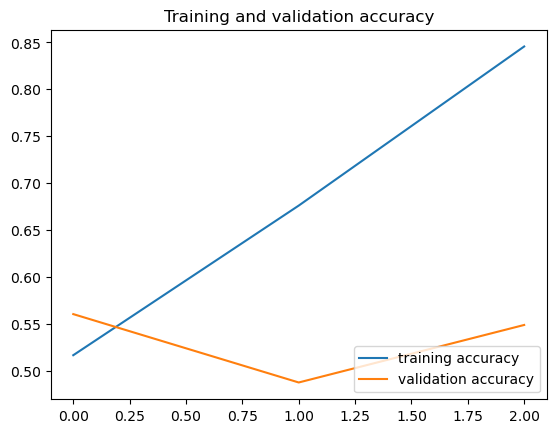

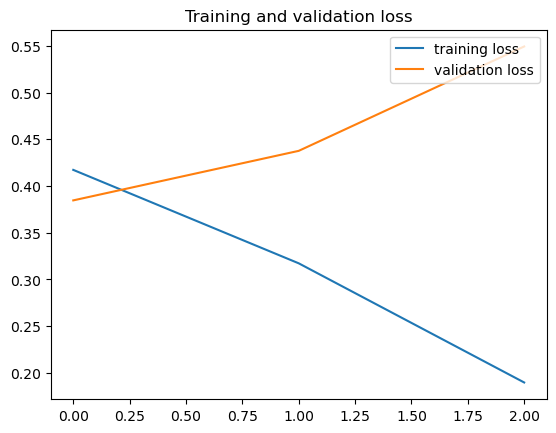

In [27]:
## Accuracy and Loss plots

accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss =train.history['loss']
val_loss = train.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [33]:
# Saving model and its weights for future use

model.save('cnn_normalized.h5')
model.save_weights('cnn_weights1.weights.h5')

# Transfer Learning

# VGG16

In [28]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = VGG16(input_shape=X_train[0].shape,
                   weights='imagenet',
                   include_top=False) #imports the VGG16 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(256, activation='relu')(x) #dense layer 3
preds = Dense(5, activation='softmax')(x) #final layer with softmax activation

model_vgg16 = Model(inputs=base_model.input,
                    outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_vgg16.layers[:20]:
    layer.trainable=False
for layer in model_vgg16.layers[20:]:
    layer.trainable=True



Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │         525,3

 Total params: 15,897,413 (60.64 MB)

 Trainable params: 1,182,725 (4.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [29]:
# Compiling model
callback1 = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2,restore_best_weights=True)
model_vgg16.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_vgg16.summary()

In [51]:
# Fitting the model
train1=model_vgg16.fit(X_train, y_train_onehot , validation_data=(X_val,y_val_onehot), 
                  epochs=10,batch_size=32,callbacks=callback1)

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 405s 4s/step - accuracy: 0.5442 - loss: 1.1693 - val_accuracy: 0.7292 - val_loss: 0.7234
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 388s 4s/step - accuracy: 0.7958 - loss: 0.5591 - val_accuracy: 0.7975 - val_loss: 0.5723


Text(0.5, 1.0, 'Training and validation loss')

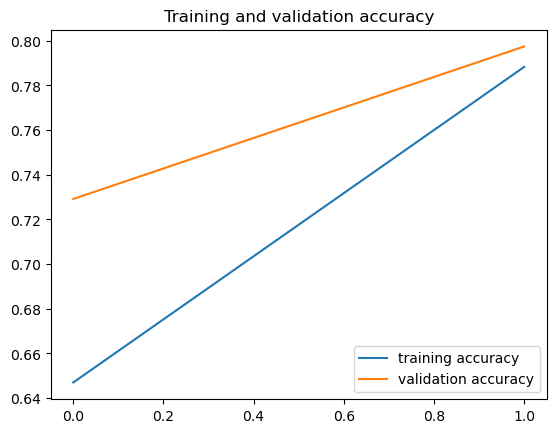

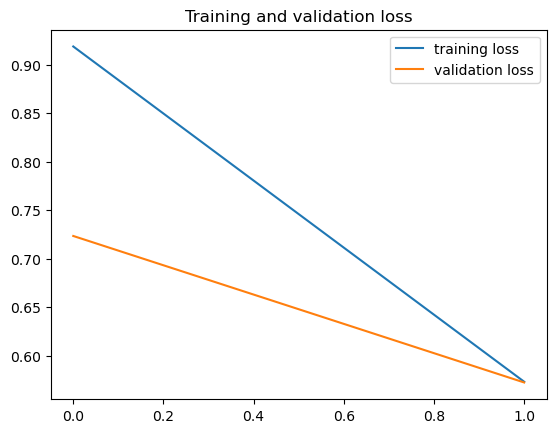

In [52]:
## Accuracy and Loss plots

accuracy = train1.history['accuracy']
val_accuracy = train1.history['val_accuracy']
loss = train1.history['loss']
val_loss = train1.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [53]:
# Saving model weights

model_vgg16.save('vgg16.h5')
model_vgg16.save_weights('vgg16_weights.weights.h5')

# VGG19

In [54]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = VGG19(input_shape=X_train[0].shape,
                   weights='imagenet',
                   include_top=False) #imports the VGG16 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(256, activation='relu')(x) #dense layer 3
preds = Dense(5, activation='softmax')(x) #final layer with softmax activation

model_vgg19 = Model(inputs=base_model.input,
                    outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_vgg19.layers[:20]:
    layer.trainable=False
for layer in model_vgg19.layers[20:]:
    layer.trainable=True



In [55]:
# Compiling model
callback2 = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2,restore_best_weights=True)
model_vgg19.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_vgg19.summary()

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,207,109 (80.90 MB)

 Trainable params: 3,542,533 (13.51 MB)

 Non-trainable params: 17,664,576 (67.39 MB)

In [57]:
# Fitting the model
train2=model_vgg19.fit(X_train, y_train_onehot , validation_data=(X_val,y_val_onehot), 
                  epochs=10,batch_size=32,callbacks=callback2)

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 518s 5s/step - accuracy: 0.5542 - loss: 0.3625 - val_accuracy: 0.7477 - val_loss: 0.2303
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 509s 5s/step - accuracy: 0.8342 - loss: 0.1638 - val_accuracy: 0.8032 - val_loss: 0.1854
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 513s 5s/step - accuracy: 0.8871 - loss: 0.1161 - val_accuracy: 0.8044 - val_loss: 0.1910
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 470s 4s/step - accuracy: 0.9151 - loss: 0.0906 - val_accuracy: 0.8021 - val_loss: 0.2055


Text(0.5, 1.0, 'Training and validation loss')

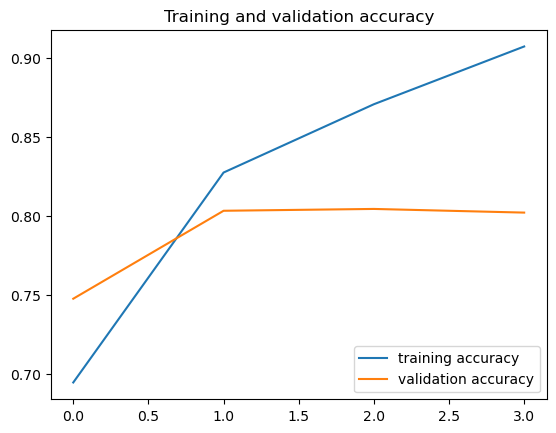

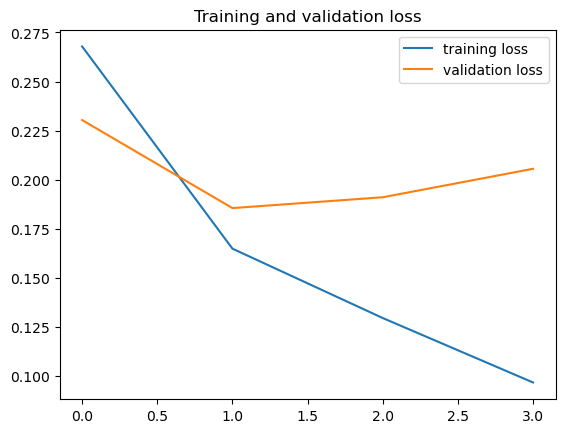

In [58]:
## Accuracy and Loss plots

accuracy = train2.history['accuracy']
val_accuracy = train2.history['val_accuracy']
loss = train2.history['loss']
val_loss = train2.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [59]:
# Saving model and its weights for future use

model_vgg19.save('vgg19.h5')
model_vgg19.save_weights('vgg19_weights.weights.h5')

# Resnet50

In [60]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = ResNet50(input_shape=X_train[0].shape,
                      weights='imagenet',
                      include_top=False) #imports the ResNet50 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(256, activation='relu')(x) #dense layer 3
preds = Dense(5, activation='softmax')(x) #final layer with softmax activation

model_resnet50 = Model(inputs=base_model.input,
                       outputs=preds)

# set the first 150 layers of the network to be non-trainable
for layer in model_resnet50.layers[:150]:
    layer.trainable=False
for layer in model_resnet50.layers[150:]:
    layer.trainable=True


In [61]:
# Compiling model
callback3 = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2,restore_best_weights=True)
model_resnet50.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_resnet50.summary()


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 134, 134, 3)       │               0 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 64, 64, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 64, 64, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 64, 64, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 66, 66, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 32, 32, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 32, 32, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 32, 32, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 26,343,301 (100.49 MB)

 Trainable params: 12,745,733 (48.62 MB)

 Non-trainable params: 13,597,568 (51.87 MB)

In [63]:
# Fitting the model
train3=model_resnet50.fit(X_train, y_train_onehot , validation_data=(X_val,y_val_onehot), 
                  epochs=10,batch_size=32,callbacks=callback3)

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 276s 2s/step - accuracy: 0.3022 - loss: 0.5120 - val_accuracy: 0.3484 - val_loss: 0.8981
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.4379 - loss: 0.4267 - val_accuracy: 0.3229 - val_loss: 1.9614
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - accuracy: 0.5078 - loss: 0.3971 - val_accuracy: 0.2998 - val_loss: 3.2037


Text(0.5, 1.0, 'Training and validation loss')

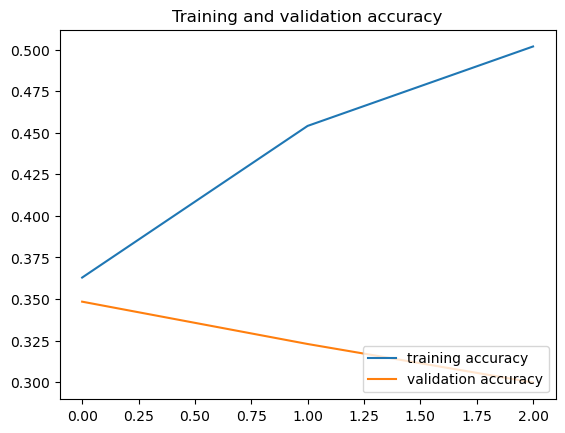

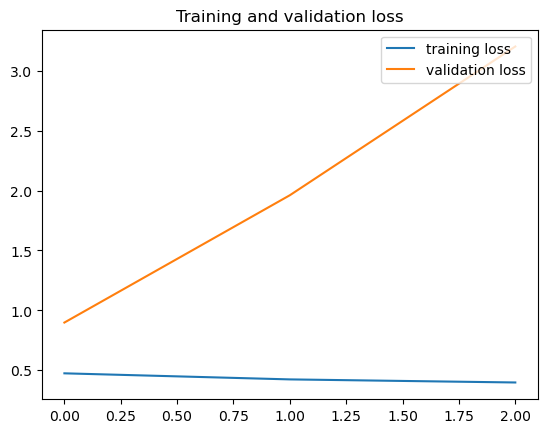

In [65]:
## Accuracy and Loss plots

accuracy =train3.history['accuracy']
val_accuracy = train3.history['val_accuracy']
loss = train3.history['loss']
val_loss = train3.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [66]:
# Saving model and its weights for future use

model_resnet50.save('vgg19.h5')
model_resnet50.save_weights('vgg19_weights.weights.h5')

# MobileNet

In [128]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = MobileNet(input_shape=X_train[0].shape,
                       weights='imagenet',
                       include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional

x = Dense(128,activation='relu')(x)
x = Dense(64,activation='relu')(x)
preds = Dense(5,activation='softmax')(x) #final layer with softmax activation

model_mobilenet = Model(inputs=base_model.input,
                        outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_mobilenet.layers[:20]:
    layer.trainable=False
for layer in model_mobilenet.layers[20:]:
    layer.trainable=True


In [129]:
# Compiling model
callback4 = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2,restore_best_weights=True)
model_mobilenet.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_mobilenet.summary()

Model: "functional_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 64, 64, 32)          │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 64, 64, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 64, 64, 32)          │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 64, 64, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 64, 64, 64)          │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 64, 64, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 65, 65, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 32, 32, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 32, 32, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 32, 32, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 32, 32, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 32, 32, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 32, 32, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 32, 32, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,368,645 (12.85 MB)

 Trainable params: 3,332,741 (12.71 MB)

 Non-trainable params: 35,904 (140.25 KB)

In [130]:
# Fitting the model
train4=model_mobilenet.fit(X_train, y_train_onehot , validation_data=(X_val,y_val_onehot), 
                  epochs=10,batch_size=32,callbacks=callback4)

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.7346 - loss: 0.2701 - val_accuracy: 0.2106 - val_loss: 2.4258
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.8939 - loss: 0.1155 - val_accuracy: 0.7130 - val_loss: 0.5359
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9157 - loss: 0.0914 - val_accuracy: 0.6400 - val_loss: 0.5607
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.9354 - loss: 0.0690 - val_accuracy: 0.8079 - val_loss: 0.2710
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9460 - loss: 0.0650 - val_accuracy: 0.8229 - val_loss: 0.2356
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9652 - loss: 0.0425 - val_accuracy: 0.8345 - val_loss: 0.1756
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.9611 - loss: 0.0402 - val_accuracy: 0.8021 - val_loss: 0.3493
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9637 - loss: 0.0427 - val_accu

Text(0.5, 1.0, 'Training and validation loss')

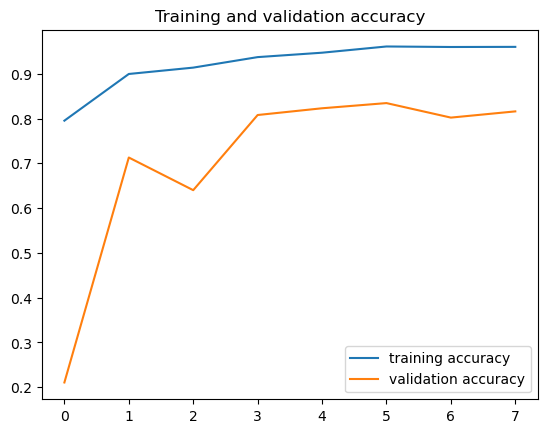

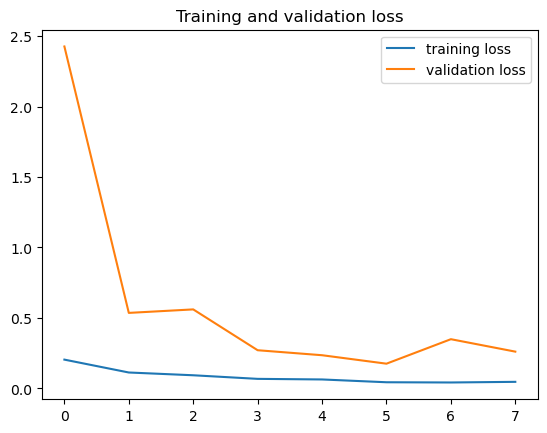

In [131]:
## Accuracy and Loss plots

accuracy =train4.history['accuracy']
val_accuracy = train4.history['val_accuracy']
loss = train4.history['loss']
val_loss =train4.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [132]:
# Saving model and its weights for future use

model_mobilenet.save('mobilenet.h5')
model_mobilenet.save_weights('mobilenet_weights.weights.h5')

# Analysis:


Basic CNN Model: Shows a decline in validation accuracy and an increase in validation loss, indicating overfitting or poor generalization.

VGG16 Model: Shows a significant improvement in validation accuracy and a reduction in validation loss, but only over 2 epochs.

VGG19 Model: Consistently high validation accuracy (above 80%) and low validation loss (below 0.25), indicating good performance and generalization.

ResNet50 Model: Poor validation accuracy and high validation loss, indicating underfitting.

MobileNet Model: Shows the best overall improvement and performance with the highest validation accuracy and a relatively low validation loss.

# Conclusion:


The MobileNet model appears to be the best model based on its performance metrics, particularly its high validation accuracy and relatively low validation loss, indicating it generalizes well to the validation data. The VGG19 model also performs well, but MobileNet achieves higher validation accuracy in the later epochs.

# Loading the saved models and doing the prediction

In [133]:
from tensorflow.keras.models import load_model

# Loading MobileNet
model_mobilenet = load_model('mobilenet.h5')

# Loading VGG16
model_vgg16 = load_model('vgg16.h5')

# Loading VGG19
model_vgg19 = load_model('vgg19.h5')

# Loading Resnet50
model_resnet50 = load_model('resnet50.h5')
# Loading basic tuned model
model_resnet50 = load_model('cnn_normalized.h5')


In [134]:
import numpy as np
import cv2

# Preprocessing the test data before prediction
X_test = []
y_test = []
labels = []
height = 128
width = 128

for i in os.listdir(os.path.join('flowers')):
    if i !='.DS_Store':
        labels.append(i)
        for j in os.listdir(os.path.join('flowers', i)):
            if j != '.DS_Store':
                image = cv2.imread(os.path.join('flowers', i, j))
                image = cv2.resize(image, (height, width))
                X_test.append(image)
                y_test.append(i)

print(labels)
X_test_array = np.array(X_test)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


MobileNet
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Softmax Outputs: [[7.3646154e-04 9.1896534e-01 3.0207066e-04 2.1783592e-02 5.8212522e-02]]
Predicted_Label_mobilenet: dandelion
------------------------------------------------------------
VGG16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Softmax Outputs: [[1.8590011e-26 1.0869121e-36 1.2644439e-19 1.2809381e-31 1.0000000e+00]]
Predicted_Label_vgg16: tulip
------------------------------------------------------------
VGG19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Softmax Outputs: [[0.01204335 0.22480024 0.03807029 0.05262475 0.6724614 ]]
Predicted_Label_vgg19: tulip
------------------------------------------------------------
ResNet50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Softmax Outputs: [[0. 0. 1. 0. 0.]]
Predicted_Label_resnet50: rose
------------------------------------------------------------
cnn_normalized.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Softmax Outputs: [[0. 0. 1. 0. 0.]]
Predicted_Label_cnn_normalized.h5: rose


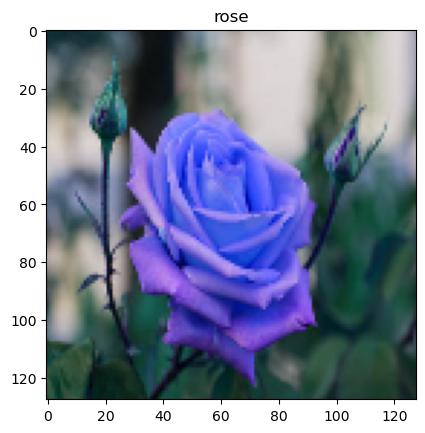

In [136]:
# Predicting and vizualizing the test image using pretrained Models

import matplotlib.pyplot as plt
%matplotlib inline

n=1910
plt.title(y_test[n])
plt.imshow(X_test[n])

# MobileNet
print('MobileNet')
y_pred_mn = model_mobilenet.predict(X_test[n].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred_mn)

# Convert the predicted probabilities to labels
for i in y_pred_mn:
    for j, k in enumerate(i):
        if k == y_pred_mn.max():
            print('Predicted_Label_mobilenet:', labels[j])


# VGG16
print('-'*60)
print('VGG16')
y_pred_vgg16 = model_vgg16.predict(X_test[n].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred_vgg16)

# Convert the predicted probabilities to labels
for i in y_pred_vgg16:
    for j, k in enumerate(i):
        if k == y_pred_vgg16.max():
            print('Predicted_Label_vgg16:', labels[j])


# VGG19
print('-'*60)
print('VGG19')
y_pred_vgg19 = model_vgg19.predict(X_test[n].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred_vgg19)

#Convert the predicted probabilities to labels
for i in y_pred_vgg19:
    for j, k in enumerate(i):
        if k == y_pred_vgg19.max():
            print('Predicted_Label_vgg19:', labels[j])

# ResNet50
print('-'*60)
print('ResNet50')
y_pred_rn = model_resnet50.predict(X_test[n].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred_rn)

# Convert the predicted probabilities to labels
for i in y_pred_rn:
    for j, k in enumerate(i):
        if k == y_pred_rn.max():
            print('Predicted_Label_resnet50:', labels[j])
            
            
            # basic model
print('-'*60)
print('cnn_normalized.h5')
y_pred_rn = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred_rn)

# Convert the predicted probabilities to labels
for i in y_pred_rn:
    for j, k in enumerate(i):
        if k == y_pred_rn.max():
            print('Predicted_Label_cnn_normalized.h5:', labels[j])
            
            


# Final conclusion:

Even though MobileNet has high accuracy than ResNet50 but in practical ResNet50 is more accurate in predicting the models.Resnet50 is perfroming well incomparision to all the pretrained models.ResNet50 model has poor validation accuracy and high validation loss, yet seems to provide more accurate predictions in practice, could be due to several reasons:


1.Class Imbalance and Specificity
2.Overfitting and Generalization
3.Evaluation Metrics
4.Evaluation Metrics